# Handwritten digit recognition: One vs All approach

This notebook containes a cleaned up version of the multi-class learning  notebook for the same application. A clearer implementation of one vs all is present here. The approach will be as follows:

1. import the dataset and declare the matrix X which will contain the pixel data
2. loop through the number of labels for the specific application (10 in this case)
3. for each loop declare a matrix Y<sub>i</sub> that will contain 1s and 0s. A 1 represents that the corresponding image in the X matrix represents the i<sup>th</sup> label while a 0 represents that it doesn't
4. call oneVall function and gradient descent 
5. update the matrix all_theta by adding a new row which will be the final values of theta after gradient descent
6. use predict function to test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
from scipy import optimize
from scipy.special import expit

In [153]:
input_layer_size = 784
num_labels = 10
data = pd.read_csv('dataset2/train.csv')
print(data.shape)
data_temp = data.head(5000)
data.head()
data.tail()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


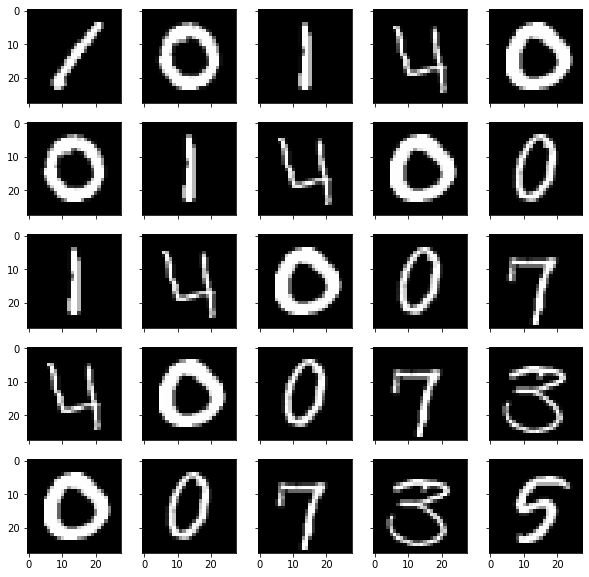

In [5]:
img1 = data.iloc[:25,1:].values
fig, ax = plt.subplots(nrows=5,ncols=5,sharey = True, sharex = True)
fig.set_figwidth(10)
fig.set_figheight(10)
for i in range(5):
  for j in range(5):
    img = img1[i+j].reshape(28,28)
    ax[i,j].imshow(img, cmap='gray')

In [112]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [141]:
x = data_temp.iloc[:,1:].values
ones = np.array([1 for i in range(len(x))])
x = np.column_stack((ones,x))
y = data_temp.iloc[:,0].values
x.shape

(5000, 785)

In [142]:
def gradDesc(theta,x,y,m):
    h = sigmoid(x*theta)
    grad = np.transpose(x)*(h-np.transpose(y))
    return grad/m

def oneVall(x,y,alpha,itr):
    m,n = x.shape
    theta = np.transpose(np.matrix(np.zeros(n)))
    x = np.matrix(x)
    y = np.matrix(y)
    for i in range(itr):
        theta = theta - alpha*gradDesc(theta,x,y,m)
    return np.array(np.transpose(theta))

In [147]:
all_theta = np.array([np.zeros(785)])
for j in range(num_labels):
    yIn = (y == j).astype(int)
    temp = oneVall(x,yIn,0.00000001,1000)
    all_theta = np.append(all_theta, temp, axis=0)
    #all_theta = np.vstack([all_theta,temp])
all_theta.shape
all_theta = all_theta[1:,:]

In [154]:
def predict(theta,x):
    theta = np.matrix(theta)
    x = np.matrix(x)
    return sigmoid(theta*np.transpose(x))
xTest = data.iloc[41997:41998,1:].values
xTest = np.append(1,xTest)
print(predict(all_theta,xTest))

[[0.13667537]
 [0.04637424]
 [0.06269306]
 [0.0821832 ]
 [0.08864045]
 [0.08541685]
 [0.06992848]
 [0.20942973]
 [0.08381497]
 [0.1180436 ]]


In [163]:
label = np.transpose(data.iloc[0:42000,0:1].values)

In [164]:
count = 0
for k in range(0,42000):
    xTest = data.iloc[k:k+1,1:].values
    xTest = np.append(1,xTest)
    j = np.transpose(predict(all_theta,xTest))
    if j.argmax() == label[0][k]:
        count +=1
print(f"Percent Accuracy: {100*count/42000}%")

Percent Accuracy: 76.02142857142857%


## Points to note:

1. As seen in the above cell, we have obtained a model with 76 percent accuracy
2. We can run better optimization algorithms instead of iterating gadrient descent and using a predetermined value alpha using scipy.optimize.minimize
3. Increasing the number of iterations and reducing alpha will only increase the time taken to train the model